# Data Cleaning & Analyzing Guided Project: Employee Exit Survey


Working with exit surveys from employyes of [Technical and Further Education institute (TAFE)](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and [Department of Education, Training and Employment (DETE)](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey), we will answer the following questions: 

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

We need to combine the results for both surveys, which share some of the template features but not all. 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read in files
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [ ]:
#print the first few rows of the dataframes
dete_survey.head()

In [ ]:
tafe_survey.head()

In [ ]:
# overview of the dataframes
dete_survey.info()

In [ ]:
tafe_survey.info()

In [ ]:
# some exploration of DETE dataframe
dete_survey['SeparationType'].value_counts()

In [ ]:
dete_survey['SeparationType'].value_counts()

In [ ]:
# some exploration of TAFE dataframe
tafe_survey['LengthofServiceOverall. Overall Length of Service at Institute (in years)'].value_counts()

Some observations about the data:

* The `dete_survey` dataframe contains `'Not Stated'` values which should be changed to `NaN`.
* We only want to see information about how long the employee was at the institutes and the jobs they had before, so most of the columns should be discarded.
* The two surveys have similar template but the column names are differnt - we need to standardize that.

### Addressing NaN's and Dropping Unnecessary Columns
We'll reread the data to fix some of the problems mentioned above.

In [2]:
# Reread the csv file, but read 'Not Stated' as NaN's
dete_survey = pd.read_csv('dete_survey.csv',na_values='Not Stated')

In [3]:
# drop columns from DETE that we won't be using
dete_survey_updated = dete_survey.drop(columns=dete_survey.columns[28:49],axis=1)
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [4]:
# drop columns from TAFE that we won't be using
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],axis=1)
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

The columns were dropped because we won't need them to answer our two main questions. For this project, we only need information regarding the length of employment, age of employees, and the reasons for leaving.

### Renaming Columns

Next, we will clean the column names so that they are all in lowercase letters and are using underscores instead of spaces.

We will also rename columns of `tafe_survey_updated` so that we can concatenate it with `dete_survey_updated`. The column names will be changed so that they match the ones in the latter dataframe.

In [6]:
# rename columns
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.replace(' ','_').str.strip()
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [7]:
col_rename = {'Record ID': 'id',
              'CESSATION YEAR': 'cease_date',
              'Reason for ceasing employment': 'separationtype',
              'Gender. What is your Gender?': 'gender',
              'CurrentAge. Current Age': 'age',
              'Employment Type. Employment Type': 'employment_status',
              'Classification. Classification': 'position',
              'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
              'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated.rename(columns=col_rename,inplace=True)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

Now, the relevant columns in the two datasets have the same names so that we can later create a larger, concatenated dataset.

### Data Filtering

Next, we will filter the datasets so that we only look at cases where the employees quit ("Resignation"). Since we want to answer who resigned and why they did so, we need not look at other cases such as retirement and contract expiration.

In [10]:
# look at the reasons why employees at DETE quit
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [11]:
# look at the reasons why employees at TAFE quit
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [13]:
# filter out only the rows where employees resigned
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains("Resignation")]
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype']=='Resignation']

### Verifying the Data

We'll now verify that the years make sense. We don't want the `dete_start_date` to be to earlier (e.g. before 1940s) because that would not make sense; and we want the `cease_date` to be a reasonable value (higher than the start date). 

In [14]:
# examine the cease dates
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
2010         1
07/2012      1
09/2010      1
Name: cease_date, dtype: int64

In [32]:
# Use vectorized string methods to extract the year 
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)
dete_resignations['cease_date'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [23]:
dete_resignations['dete_start_date'].value_counts(ascending=False)

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [24]:
tafe_resignations['cease_date'].value_counts(ascending=False)

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

In [33]:
dete_resignations['cease_date'][0:5]

3     2012.0
5     2012.0
8     2012.0
9     2012.0
11    2012.0
Name: cease_date, dtype: float64

### Create a New Column (`institute_service`)

Now, we create a column `institute_service` to record the length of employment for each of the employees.

In [38]:
# create a new column recording the length of employment
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].head()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

### Identify Dissatisfied Employees

Next, we will identify dissatisfied employees from both dataframes and store the values in a new column `dissatisfied`. If an employee had answered 'yes' to any of the questions asking about dissatisfaction in certain aspect of their work, we will regard them as a dissatisfied employee.

In [43]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [46]:
# function to turn survey results into boolean values
def update_vals (x):
    if pd.isnull(x):
        return np.nan
    elif x=='-':
        return False
    else:
        return True

In [47]:
# dissatisfied employees in TAFE
tafe_dissatisfied = tafe_resignations[['Contributing Factors. Dissatisfaction',
                                       'Contributing Factors. Job Dissatisfaction']]
tafe_resignations['dissatisfied'] = tafe_dissatisfied.applymap(update_vals).any(1,skipna=False)

# store the result in a new dataframe
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [48]:
# dissatisfied employees in DETE
dete_dissatisfaction = ['job_dissatisfaction',
                        'dissatisfaction_with_the_department',
                        'physical_work_environment',
                        'lack_of_recognition',
                        'lack_of_job_security',
                        'work_location',
                        'employment_conditions',
                        'work_life_balance',
                        'workload']
dete_resignations['dissatisfied'] = dete_resignations[dete_dissatisfaction].any(1,skipna=False)

# store the result in a new dataframe
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



False    162
True     150
Name: dissatisfied, dtype: int64

### Combine the Data

We finally combine the datasets!

In [50]:
# before combining, add columns that identify the institution
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'
combined = pd.concat([dete_resignations_up,tafe_resignations_up])

In [52]:
# drop nan's
combined_updated = combined.dropna(thresh=500,axis=1).copy()
combined_updated.head()

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype
3,36-40,2012.0,False,Permanent Full-time,Female,4.0,DETE,7,Teacher,Resignation-Other reasons
5,41-45,2012.0,True,Permanent Full-time,Female,6.0,DETE,18,Guidance Officer,Resignation-Other reasons
8,31-35,2012.0,False,Permanent Full-time,Female,9.0,DETE,3,Teacher,Resignation-Other reasons
9,46-50,2012.0,True,Permanent Part-time,Female,10.0,DETE,15,Teacher Aide,Resignation-Other employer
11,31-35,2012.0,False,Permanent Full-time,Male,12.0,DETE,3,Teacher,Resignation-Move overseas/interstate


### Cleaning the column `institute_service`

In [53]:
combined_updated["institute_service"].value_counts(dropna=False)

NaN                   89
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
14.0                   6
12.0                   6
17.0                   6
22.0                   6
10.0                   6
16.0                   5
18.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
39.0                   3
21.0                   3
28.0                   2
30.0                   2
26.0                   2
36.0                   2
25.0                   2


As we can see, the values are a mix of floats, strings, and NaNs. We need to clean this column before comparing.

In [56]:
# extract the years of service from each value in the institute_service column.
combined_updated["institute_service_updated"]=combined_updated["institute_service"].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_updated'] = combined_updated['institute_service_updated'].astype('float')

combined_updated["institute_service_updated"].value_counts(dropna=False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



 1.0     159
NaN       89
 3.0      83
 5.0      56
 7.0      34
 11.0     30
 0.0      20
 20.0     17
 6.0      17
 4.0      16
 9.0      14
 2.0      14
 13.0      8
 8.0       8
 15.0      7
 22.0      6
 10.0      6
 17.0      6
 14.0      6
 12.0      6
 16.0      5
 18.0      5
 24.0      4
 23.0      4
 21.0      3
 39.0      3
 32.0      3
 19.0      3
 36.0      2
 30.0      2
 25.0      2
 26.0      2
 28.0      2
 42.0      1
 29.0      1
 35.0      1
 27.0      1
 41.0      1
 49.0      1
 38.0      1
 34.0      1
 33.0      1
 31.0      1
Name: institute_service_updated, dtype: int64

Now we will categorize each values into an age group, for an easier comparison and later action plans (i.e. the employer will be able to cater to the employees' needs based on their career stage instead of a specific age).

* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

In [58]:
# map each value to one of the career stage labels 
def career_stage (num):
    if pd.isnull(num):
        pass
    elif num < 3:
        return 'New'
    elif 3 <= num <= 6:
        return 'Experienced'
    elif 7 <= num <= 10:
        return 'Established'
    elif num >= 11:
        return 'Veteran'

# check values
combined_updated['service_cat'] = combined_updated['institute_service_updated'].apply(career_stage)
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

### Final Touches & Observation

For some final modifications, we will regard 'NaN' in dissatisfaction as 'False'. 

Also, we will plot the percentage of dissatisfied employees in each age group.

In [60]:
combined_updated['dissatisfied']=combined_updated['dissatisfied'].fillna(False)
print(combined_updated['dissatisfied'].value_counts(dropna=False))

False    411
True     241
Name: dissatisfied, dtype: int64
False    411
True     241
Name: dissatisfied, dtype: int64


             dissatisfied
service_cat              
Established      0.516129
Experienced      0.343023
New              0.295337
Veteran          0.485294


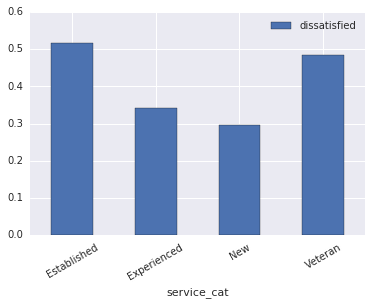

In [61]:
# boxplot
dissatisfied_percentage=combined_updated.pivot_table(index="service_cat", values="dissatisfied")
print(dissatisfied_percentage)
%matplotlib inline
dissatisfied_percentage.plot(kind='bar',rot=30)

### Conclusion

From the initial analysis, we can see that more employees with 7 or more years of service (Established & Veteran) have resigned due to some kind of dissatisfaction with the job than those with less than 7 years of service (New & Experienced). However, we need to handle the rest of the missing data to finalize our analysis.